## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 3: Machine Learning Experiments</p>
## <p style="text-align: center;">Submitted by Subhayu Chakravarty</p>



## Task 1
Read the wine data from the link provided below. 
Split the wind data into X and y. The X should have the features associated with each class of wine. The y should indicate the type of wine. 

Peform PCA and extract the top two components. 

Generate a scatter plot for the 2 components generated by PCA. Do they appear to be in  clusters of 3? 


In [1]:
# Import statements
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA


In [2]:
# Reading dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Getting features and Labels from dataset
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values


# Standardizing the features
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

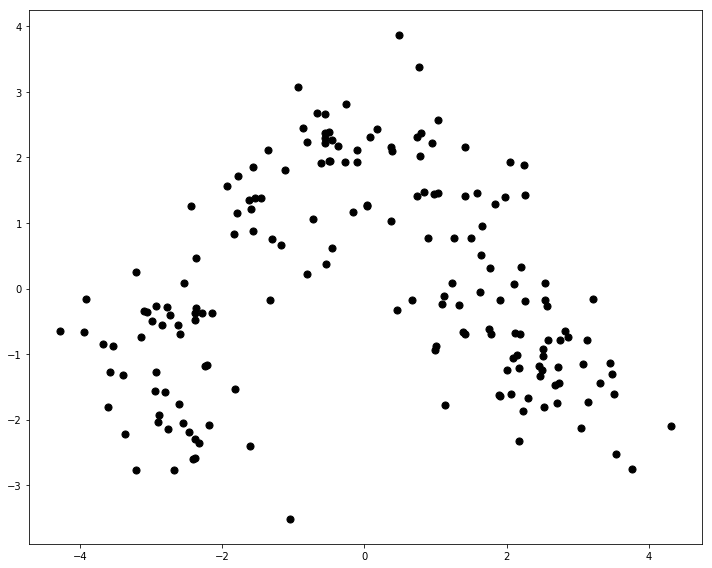

In [4]:
# Applying PCA to get Principal components
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Creating Scatter plot of data points for top two Principal Components
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='black', marker='o', s=50)
plt.tight_layout()
plt.savefig('1-pca-winedata.png', dpi=300)
plt.show()

### Yes, there are three visible clusters in the above scatter plot.

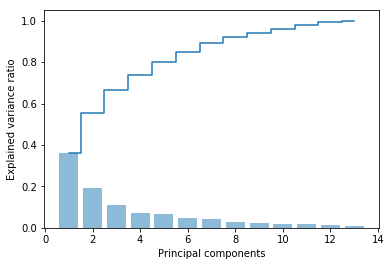

In [5]:
# Plotting explained variance graph to show most important features
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [6]:
# Taking Two Principal components using scikit-learn's PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

### Taking top 2 Principal Components as they account for around 56% of variance.

## Task 2
Run a k-means clustering model for the input data. This should generate the cluster centoids. Perform this for a value of k=3 and plot the cluster centroid vs. data points in that cluster as a scatter plot. 

To check how well k-means performed, print the prediction accuracy and plot the confusion matrix. 
It is not straightforward to print the accuracy score. Makesure to match the predicted wine class to the original wine class and then print the accuracy. 


In [7]:
# Applying K-Means clustering to classify data

kmeans = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=500,
            tol=1e-04,
            random_state=9).fit(X_pca)

# Predicted Y
ypred=kmeans.predict(X_pca)


In [12]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

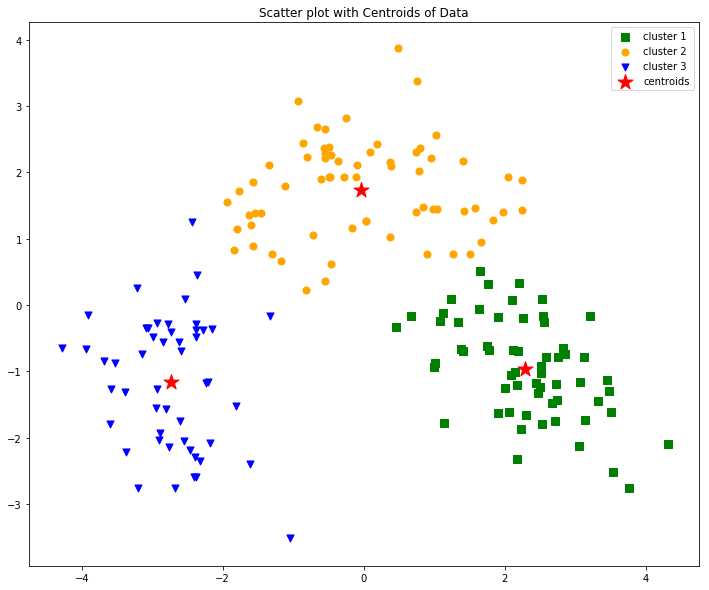

In [8]:
# Plotting clusters with centroids
plt.figure(figsize=(12,10))

plt.scatter(X_pca[ypred == 0, 0],
            X_pca[ypred == 0, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')
plt.scatter(X_pca[ypred == 1, 0],
            X_pca[ypred == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X_pca[ypred == 2, 0],
            X_pca[ypred == 2, 1],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.title("Scatter plot with Centroids of Data")
plt.legend()
plt.show()

In [9]:
# Confusion Matrix calculation
confmat = confusion_matrix(y_true=y-1, y_pred=ypred)
print("Confusion Matrix:\n")
print(confmat)

Confusion Matrix:

[[58  1  0]
 [ 3 66  2]
 [ 0  0 48]]


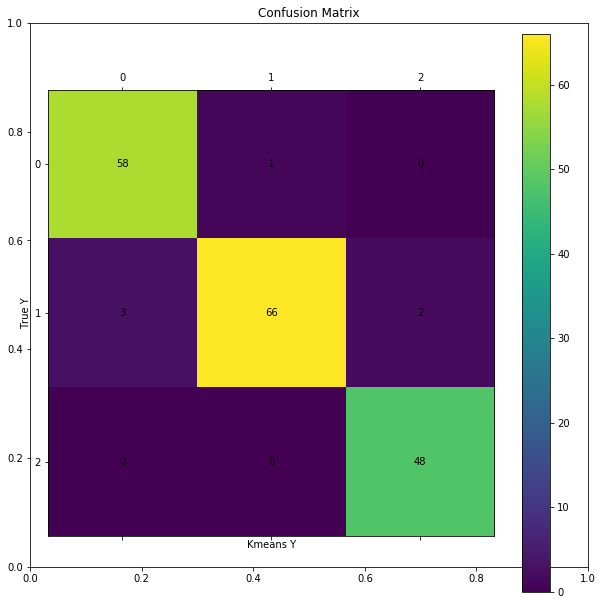

In [10]:
#Plotting Confusion Matrix
plt.figure(figsize=(10,10))
plt.title('Confusion Matrix')
plt.matshow(confmat, fignum=1)
plt.colorbar()
for (i, j), z in np.ndenumerate(confmat):
    plt.text(j, i, z, ha='center', va='center')

plt.xlabel("Kmeans Y")
plt.ylabel("True Y")

plt.show()

In [11]:
# Finding accuracy score for K-Means clustering
a=accuracy_score(y-1, ypred)
print("Accuracy Score: ",round(a,3))

Accuracy Score:  0.966


## Task 3

Run the KMeans model for different values of $k$ and plot the distortions in each case and identify the elbow of the curve for PCA'ed dataset with n=2 components. 

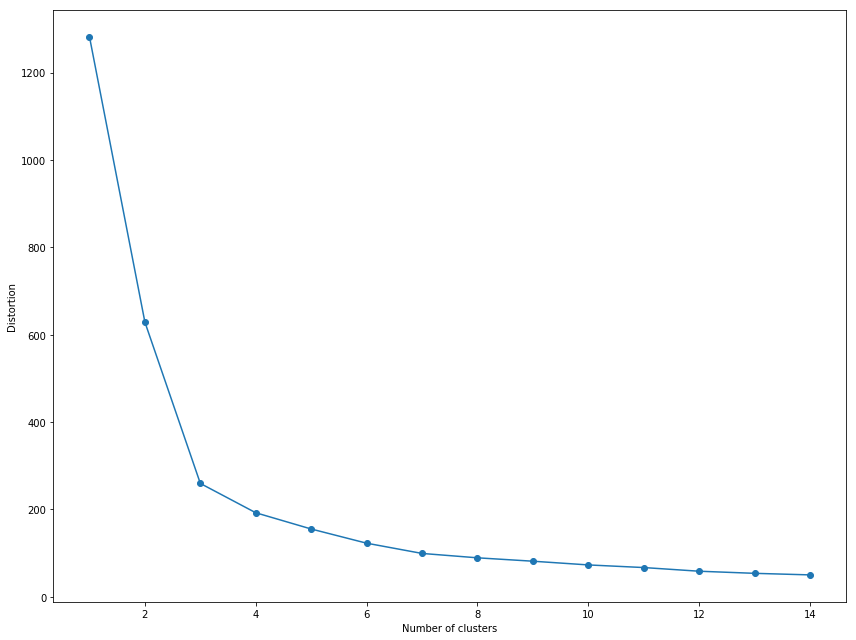

In [13]:
# Plotting distortions of K-Means clustering at different cluster-numbers(k). Taking k from 1 through 15.
distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_pca)
    distortions.append(km.inertia_)

plt.figure(figsize=(12,9))
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

The elbow of the curve occurs at 3 which is the correct number of clusters for the wine dataset. This is the optimal number of clusters as it signifies the distance of data centroids from cluster centroids and is the inflection point that gives us the optimal cluster number.

## <div align="center">The End</div>